<a href="https://colab.research.google.com/github/pdpavandesai/MergingDiabetesData/blob/main/DuttaDatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import warnings
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving By Ishan Dutta.csv.xls to By Ishan Dutta.csv.xls


In [6]:
duttaDataset_Actual = pd.read_csv('By Ishan Dutta.csv.xls')
duttaDataset_Actual_Copy = duttaDataset_Actual.copy()
print('Actual shape of dataset before any processing: ',duttaDataset_Actual_Copy.shape)
actual_Rows = duttaDataset_Actual_Copy.shape[0]
duttaDataset_Actual_Copy = duttaDataset_Actual_Copy.drop_duplicates()
print('Shape of dataset after removing the duplicates: ',duttaDataset_Actual_Copy.shape)
rows_AfterDeleting_Duplicates = duttaDataset_Actual_Copy.shape[0]
print('No.of Duplicate rows in the Ishan Dutta''s Dataset = ', (actual_Rows - rows_AfterDeleting_Duplicates))

Actual shape of dataset before any processing:  (520, 17)
Shape of dataset after removing the duplicates:  (251, 17)
No.of Duplicate rows in the Ishan Duttas Dataset =  269


In [7]:
duttaDataset_Actual_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 251 non-null    int64 
 1   Gender              251 non-null    object
 2   Polyuria            251 non-null    object
 3   Polydipsia          251 non-null    object
 4   sudden weight loss  251 non-null    object
 5   weakness            251 non-null    object
 6   Polyphagia          251 non-null    object
 7   Genital thrush      251 non-null    object
 8   visual blurring     251 non-null    object
 9   Itching             251 non-null    object
 10  Irritability        251 non-null    object
 11  delayed healing     251 non-null    object
 12  partial paresis     251 non-null    object
 13  muscle stiffness    251 non-null    object
 14  Alopecia            251 non-null    object
 15  Obesity             251 non-null    object
 16  class               251 no

In [8]:
duttaDataset_Actual_Copy.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [9]:
duttaDataset_Actual_Copy.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [10]:
duttaDataset_Actual_Copy.head(15)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [20]:
duttaDataset_Actual_Copy.describe()

,Age
count,251.000000
mean,48.864542
std,12.526036
min,16.000000
25%,39.000000
50%,48.000000
75%,58.000000
max,90.000000


# Distribution of target feature

Text(0.5, 1.0, 'Distribution of Diabetes class')

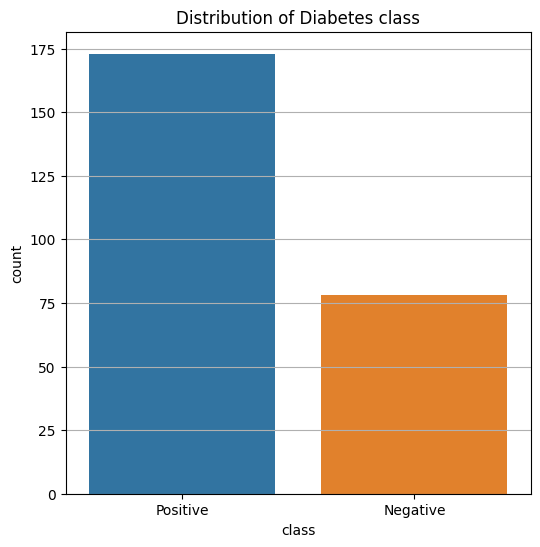

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(data=duttaDataset_Actual_Copy, x='class').yaxis.grid(True)
plt.title('Distribution of Diabetes class')

# Distributions of predictor variables

Text(0.5, 1.0, 'Distribution of Age in the dataset')

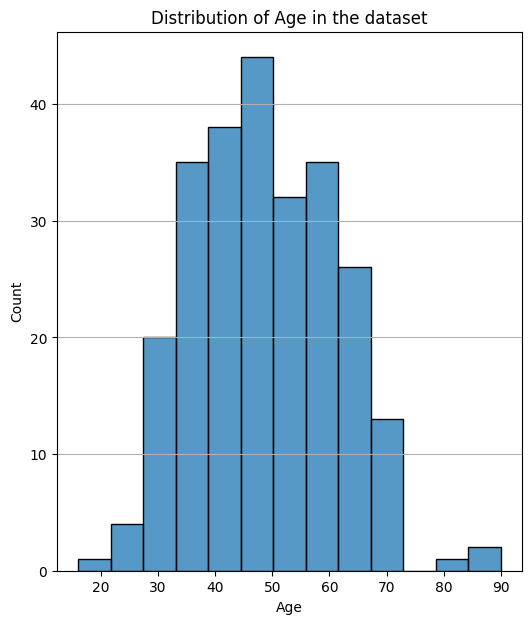

In [30]:
plt.figure(figsize=(6,7))
sns.histplot(data=duttaDataset_Actual_Copy,x='Age').yaxis.grid(True)
plt.title('Distribution of Age in the dataset')

Text(0.5, 1.0, 'Distribution of Gender in the dataset')

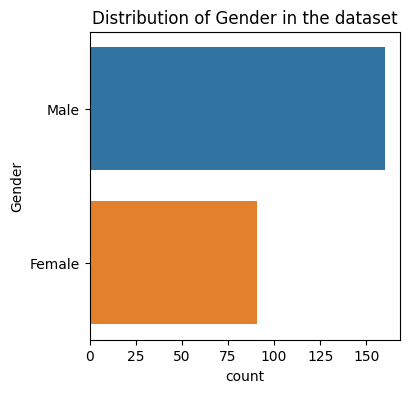

In [36]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Gender')
plt.title('Distribution of Gender in the dataset')

Text(0.5, 1.0, 'Distribution of Polydipsia in the dataset')

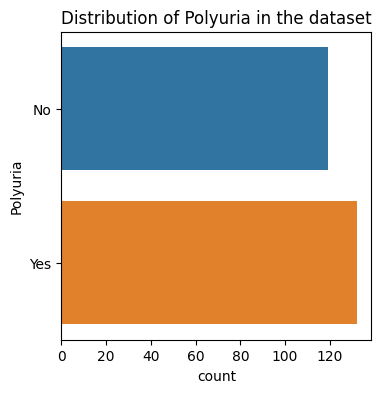

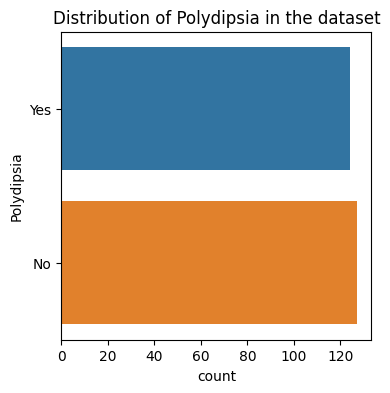

In [37]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Polyuria')
plt.title('Distribution of Polyuria in the dataset')

plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Polydipsia')
plt.title('Distribution of Polydipsia in the dataset')

Text(0.5, 1.0, 'Distribution of people with weakness in the dataset')

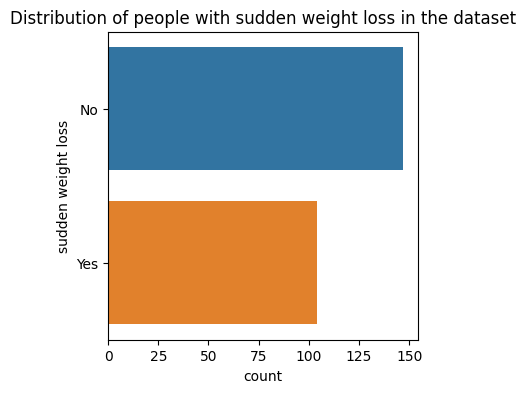

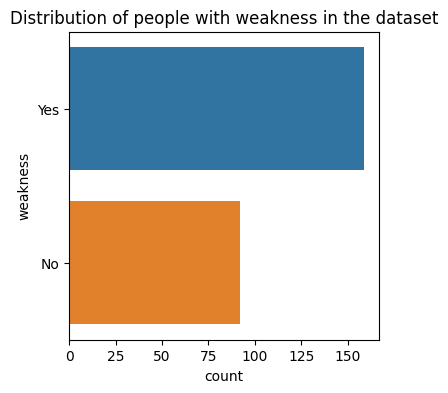

In [38]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='sudden weight loss')
plt.title('Distribution of people with sudden weight loss in the dataset')

plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='weakness')
plt.title('Distribution of people with weakness in the dataset')

Text(0.5, 1.0, 'Distribution of people with genital thrush in the dataset')

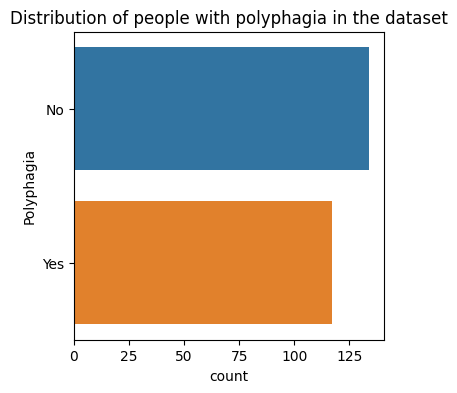

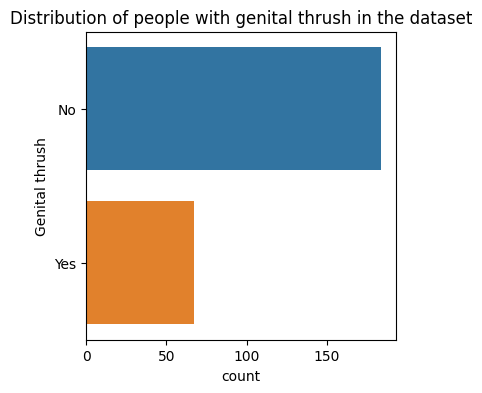

In [40]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Polyphagia')
plt.title('Distribution of people with polyphagia in the dataset')

plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Genital thrush')
plt.title('Distribution of people with genital thrush in the dataset')

Text(0.5, 1.0, 'Distribution of people with itching in the dataset')

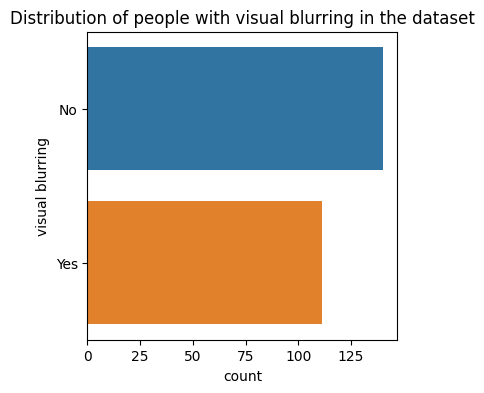

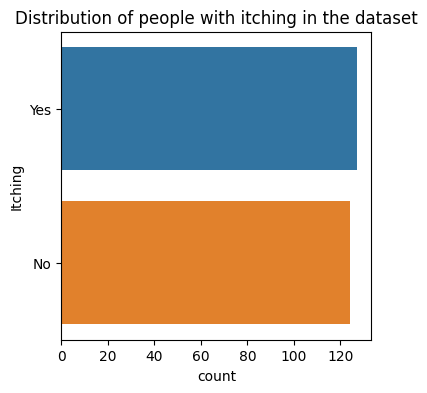

In [41]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='visual blurring')
plt.title('Distribution of people with visual blurring in the dataset')

plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Itching')
plt.title('Distribution of people with itching in the dataset')

Text(0.5, 1.0, 'Distribution of people with irritability in the dataset')

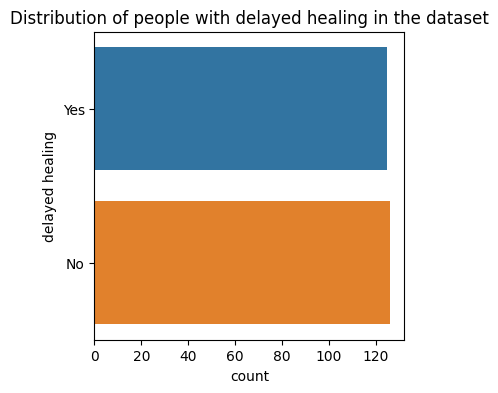

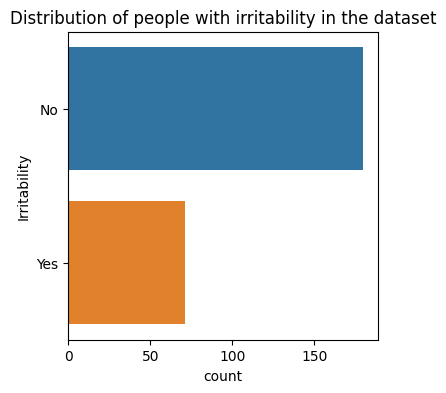

In [42]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='delayed healing')
plt.title('Distribution of people with delayed healing in the dataset')

plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Irritability')
plt.title('Distribution of people with irritability in the dataset')

Text(0.5, 1.0, 'Distribution of people with muscle stiffness in the dataset')

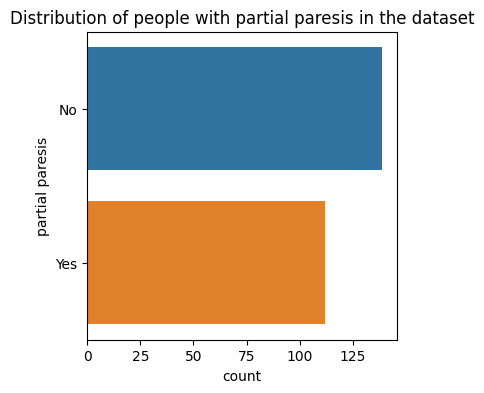

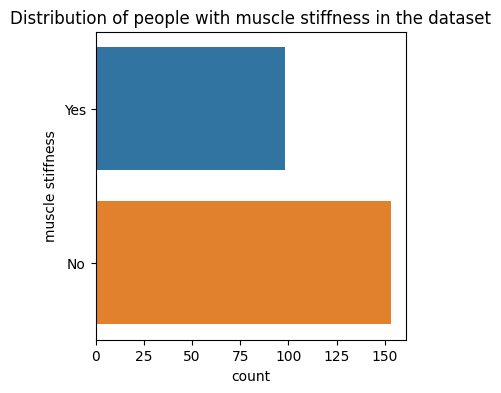

In [43]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='partial paresis')
plt.title('Distribution of people with partial paresis in the dataset')

plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='muscle stiffness')
plt.title('Distribution of people with muscle stiffness in the dataset')

Text(0.5, 1.0, 'Distribution of people with Obesity in the dataset')

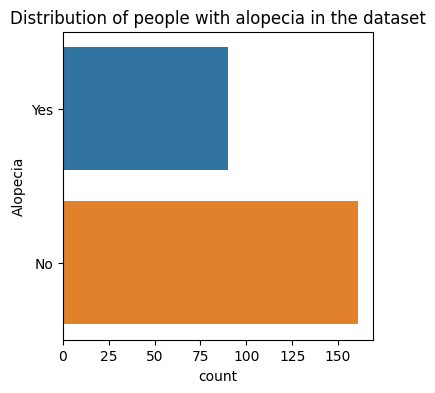

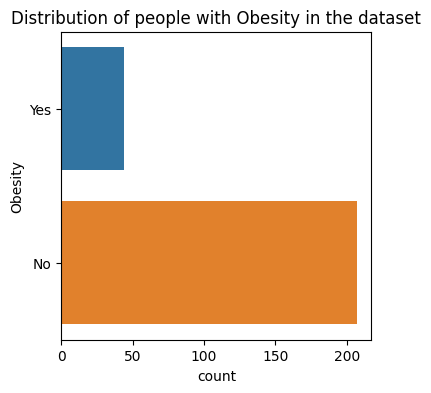

In [46]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Alopecia')
plt.title('Distribution of people with alopecia in the dataset')

plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Obesity')
plt.title('Distribution of people with Obesity in the dataset')

# Relation(Visual) between target feature & continuous variable['Age']

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Age')

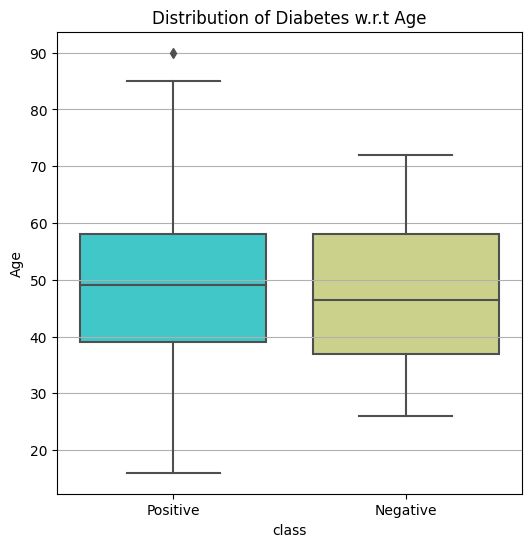

In [47]:
plt.figure(figsize=(6,6))
sns.boxplot(data=duttaDataset_Actual_Copy,x='class',y='Age',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t Age')

# Understanding the variation in target-feature diabetes w.r.t Age using ANOVA test(statistical test)

In [51]:
def FunctionAnova(inputData, targetFeature, predictorVariables):
  selectedPredictors = []
  for predictor in predictorVariables:
    categoryGroupLists = inputData.groupby(targetFeature)[predictor].apply(list)
    anovaResults = f_oneway(*categoryGroupLists)
    if(anovaResults[1] < 0.05):
      print(predictor, ' is correlated with the target-variable ', targetFeature, ' with p-value: ', round(anovaResults[1],50))
      selectedPredictors.append(predictor)
    else:
      print(predictor, ' is NOT correlated with the target-variable ', targetFeature, ' with p-value: ', round(anovaResults[1],50))
  return selectedPredictors

In [52]:
probablePredictorVariables = ['Age']
FunctionAnova(inputData=duttaDataset_Actual_Copy, targetFeature='class', predictorVariables=probablePredictorVariables)

Age  is NOT correlated with the target-variable  class  with p-value:  0.4063683568849258


[]

# Relation(Visual) between target feature diabetes and categorical variables['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity']

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Gender')

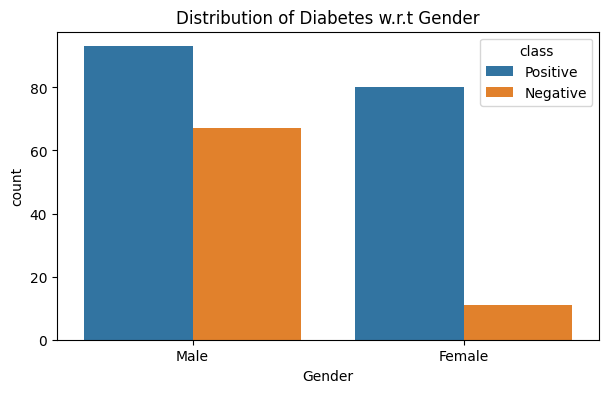

In [54]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Gender',hue='class')
plt.title('Distribution of Diabetes w.r.t Gender')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t people with sudden weight loss')

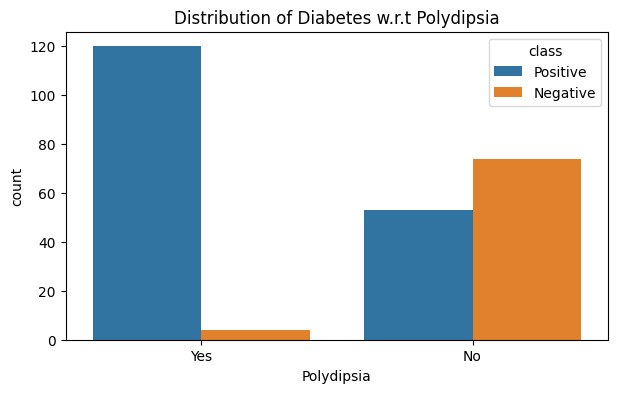

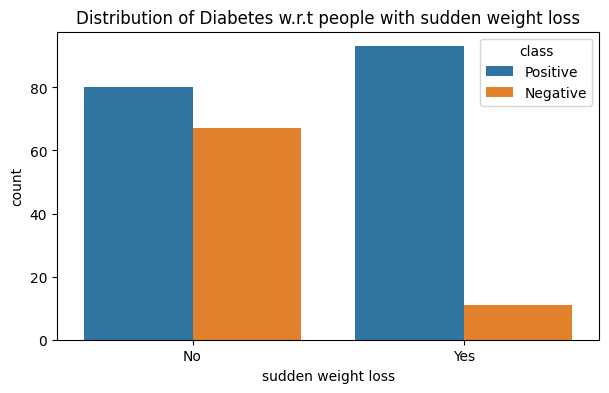

In [56]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Polydipsia',hue='class')
plt.title('Distribution of Diabetes w.r.t Polydipsia')

plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='sudden weight loss',hue='class')
plt.title('Distribution of Diabetes w.r.t people with sudden weight loss')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Polyphagia')

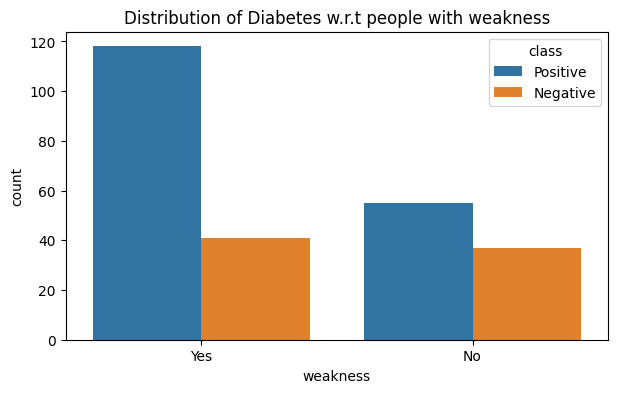

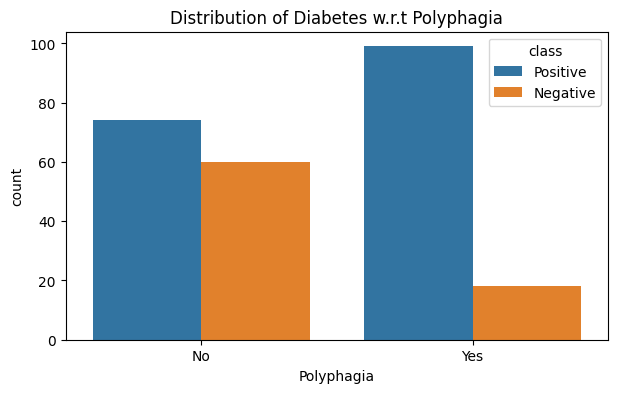

In [57]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='weakness',hue='class')
plt.title('Distribution of Diabetes w.r.t people with weakness')

plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Polyphagia',hue='class')
plt.title('Distribution of Diabetes w.r.t Polyphagia')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t people suffering with visual blurring')

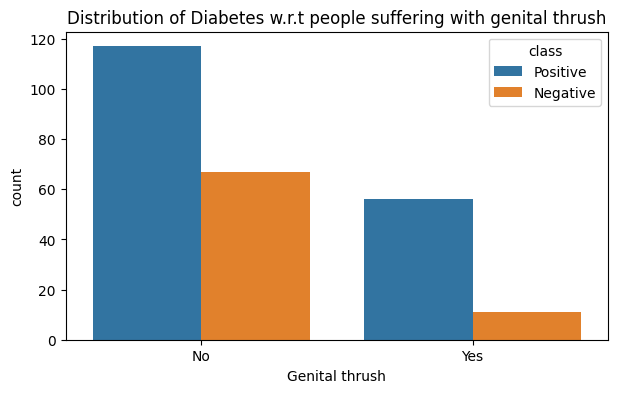

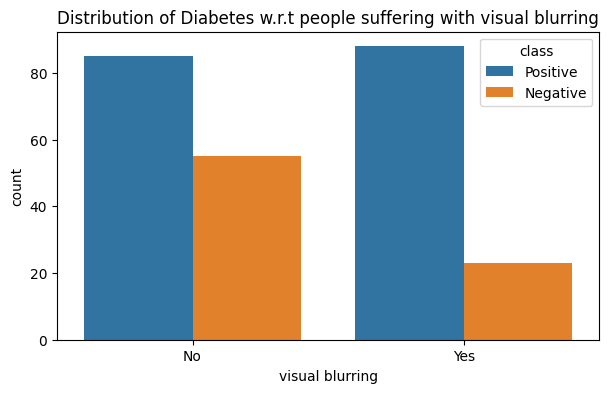

In [58]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Genital thrush',hue='class')
plt.title('Distribution of Diabetes w.r.t people suffering with genital thrush')

plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='visual blurring',hue='class')
plt.title('Distribution of Diabetes w.r.t people suffering with visual blurring')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t delayed healing')

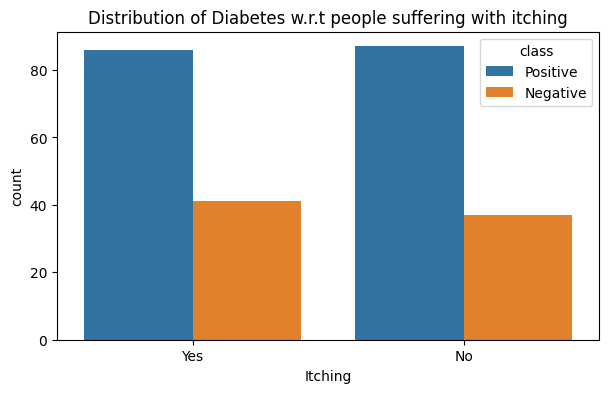

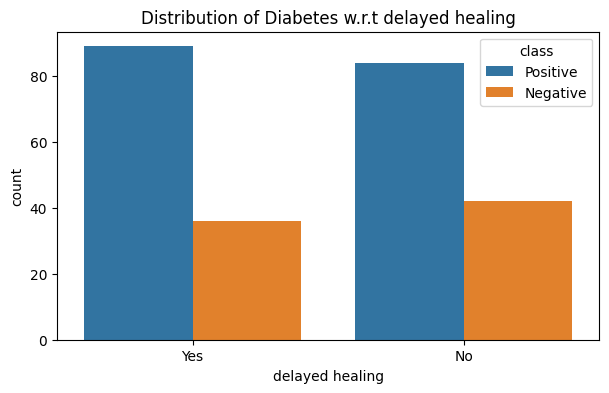

In [59]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Itching',hue='class')
plt.title('Distribution of Diabetes w.r.t people suffering with itching')

plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='delayed healing',hue='class')
plt.title('Distribution of Diabetes w.r.t delayed healing')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t people suffering with muscle stiffness')

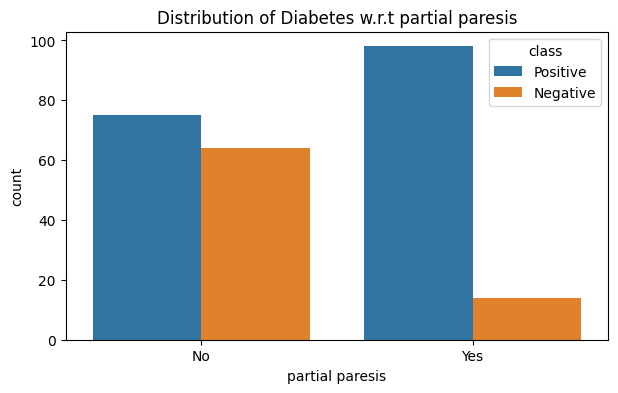

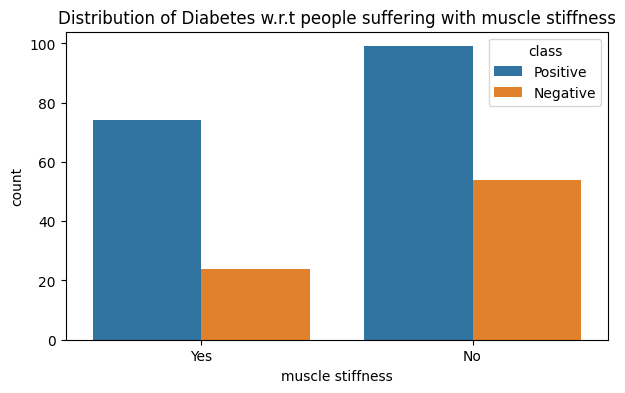

In [61]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='partial paresis',hue='class')
plt.title('Distribution of Diabetes w.r.t partial paresis')

plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='muscle stiffness',hue='class')
plt.title('Distribution of Diabetes w.r.t people suffering with muscle stiffness')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Obesity')

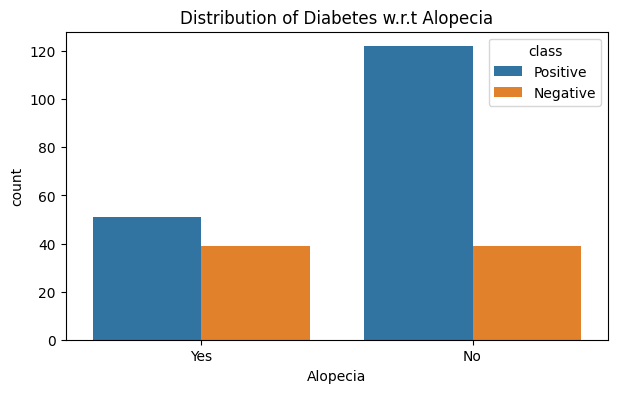

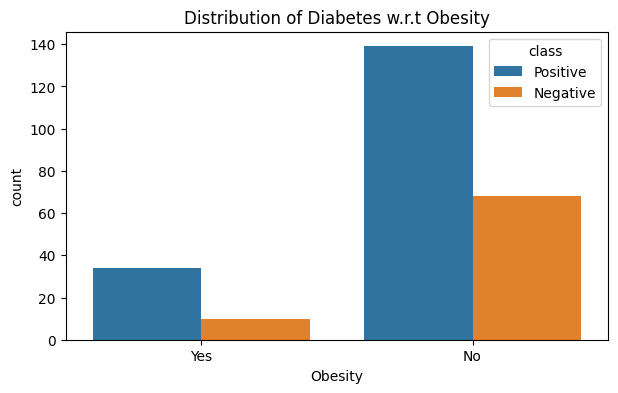

In [63]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Alopecia',hue='class')
plt.title('Distribution of Diabetes w.r.t Alopecia')

plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Obesity',hue='class')
plt.title('Distribution of Diabetes w.r.t Obesity')

# Understanding whether how much does categorical variables like ['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity'] are influencing Diabetes through Cho-Square Test(Statistical Test)

In [64]:
def chiSquareTestFunction(inputData, targetFeature, predictorVariables):
  selectedPredictors=[]
  for predictor in predictorVariables:
    crossTableResults = pd.crosstab(index=inputData[targetFeature],columns=inputData[predictor])
    chisquareResult = chi2_contingency(crossTableResults)
    if(chisquareResult[1] < 0.05):
      print(predictor, ' is correlated with the target-variable ', targetFeature, ' with p-value: ', round(chisquareResult[1],50))
      selectedPredictors.append(predictor)
    else:
      print(predictor, ' is NOT correlated with the target-variable ', targetFeature, ' with p-value: ', round(chisquareResult[1],50))
  return selectedPredictors

In [66]:
probableCategoricalPredictorVariables = ['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity']
chiSquareTestFunction(inputData=duttaDataset_Actual_Copy, targetFeature='class', predictorVariables=probableCategoricalPredictorVariables)

Gender  is correlated with the target-variable  class  with p-value:  1.9342825674627902e-06
Polyuria  is correlated with the target-variable  class  with p-value:  2.962616054637455e-22
Polydipsia  is correlated with the target-variable  class  with p-value:  1.6311284467104804e-20
sudden weight loss  is correlated with the target-variable  class  with p-value:  8.217540858596754e-09
weakness  is correlated with the target-variable  class  with p-value:  0.025159327878981584
Polyphagia  is correlated with the target-variable  class  with p-value:  1.0475387499079117e-06
Genital thrush  is correlated with the target-variable  class  with p-value:  0.004056786831463501
visual blurring  is correlated with the target-variable  class  with p-value:  0.0025356231776834815
Itching  is NOT correlated with the target-variable  class  with p-value:  0.7779225686466023
delayed healing  is NOT correlated with the target-variable  class  with p-value:  0.5224669283472492
partial paresis  is correl

['Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'partial paresis',
 'Alopecia']

# Selecting final predictors from Ishan Dutta's Dataset

In [67]:
selectedFeatures = ['Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'partial paresis',
 'Alopecia']
dataForMerging = duttaDataset_Actual_Copy[selectedFeatures]
dataForMerging.head(15)

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,partial paresis,Alopecia
0,Male,No,Yes,No,Yes,No,No,No,No,Yes
1,Male,No,No,No,Yes,No,No,Yes,Yes,Yes
2,Male,Yes,No,No,Yes,Yes,No,No,No,Yes
3,Male,No,No,Yes,Yes,Yes,Yes,No,No,No
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes
5,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes
6,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No
7,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No
8,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No
9,Male,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes
